In [51]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

train_df = pd.read_csv('application_train.csv', sep = ',')
test_df = pd.read_csv('application_test.csv', sep = ',')

print(f'Train set dimensions {train_df.shape}')
train_df.info()
print('----------------------------------------------------------------')

print(f'Test set dimensions {train_df.shape}')
test_df.info()

display(train_df.sample(10))



Train set dimensions (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
----------------------------------------------------------------
Test set dimensions (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
115446,233878,0,Cash loans,F,N,N,0,85500.0,808650.0,26217.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
125195,245188,0,Cash loans,M,Y,Y,1,225000.0,1040985.0,30568.5,...,0,0,0,0,0.0,0.0,0.0,3.0,0.0,0.0
16369,119092,0,Cash loans,F,Y,Y,0,360000.0,1024740.0,52452.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
122630,242173,1,Cash loans,F,N,N,2,135000.0,545040.0,26509.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
5171,106050,1,Cash loans,F,N,Y,0,180000.0,247500.0,19971.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
69091,180133,0,Cash loans,F,N,Y,0,153000.0,450000.0,17095.5,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,2.0
178813,307214,0,Revolving loans,F,N,Y,0,135000.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
289601,435513,0,Revolving loans,F,N,Y,0,45000.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
20955,124419,0,Cash loans,F,Y,Y,1,157500.0,1179000.0,32553.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
136238,258024,0,Cash loans,M,Y,Y,0,202500.0,355536.0,19417.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# первірка якості даних
train_df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [39]:
# можна помітити, що поганих даних набагато більше, це може погано вплинути на результат роботи багатьох алгоритмів

In [15]:
train_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [25]:
def get_missing_values(data):
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values != 0]
    total = missing_values.sum()
    
    with pd.option_context('display.max_rows', None):
        display(missing_values.sort_values(ascending = False))
        
    return missing_values, total

missing_values_train = get_missing_values(train_df)
total_train = missing_values_train[1]

print(f"Total number of missing of values in train dataset - {total_train}")

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_MODE       

Total number of missing of values in train dataset - 9152465


In [26]:
missing_values_test = get_missing_values(test_df)
total_test = missing_values_test[1]

print(f"Total number of missing of values in train dataset - {total_test}")

COMMONAREA_MODE                 33495
COMMONAREA_MEDI                 33495
COMMONAREA_AVG                  33495
NONLIVINGAPARTMENTS_MEDI        33347
NONLIVINGAPARTMENTS_AVG         33347
NONLIVINGAPARTMENTS_MODE        33347
FONDKAPREMONT_MODE              32797
LIVINGAPARTMENTS_MODE           32780
LIVINGAPARTMENTS_MEDI           32780
LIVINGAPARTMENTS_AVG            32780
FLOORSMIN_MEDI                  32466
FLOORSMIN_MODE                  32466
FLOORSMIN_AVG                   32466
OWN_CAR_AGE                     32312
YEARS_BUILD_AVG                 31818
YEARS_BUILD_MEDI                31818
YEARS_BUILD_MODE                31818
LANDAREA_MODE                   28254
LANDAREA_AVG                    28254
LANDAREA_MEDI                   28254
BASEMENTAREA_MEDI               27641
BASEMENTAREA_AVG                27641
BASEMENTAREA_MODE               27641
NONLIVINGAREA_MEDI              26084
NONLIVINGAREA_MODE              26084
NONLIVINGAREA_AVG               26084
ELEVATORS_ME

Total number of missing of values in train dataset - 1404419


In [30]:
def drop_col_with_missing_values(data):
    missing_values = get_missing_values(data)[0]
    perc_set = {}
    
    for value, i in missing_values.items():
        perc_set[value] = i / missing_values.shape[0] * 100
        
    result = {'Column': perc_set.keys(), 'Percentage': perc_set.values()}
    col_to_drop = []
    for col in perc_set.keys():
        if perc_set[col] > 60:
            col_to_drop.append(col)
    
    cleaned_data = data.drop(columns = col_to_drop)
    
    return perc_set, cleaned_data


cleaned_train_df = drop_col_with_missing_values(train_df)[1]
cleaned_missing_values_train = get_missing_values(cleaned_train_df)
cleaned_total_train = missing_values_train[1]

print(f"Total number of missing of values in train dataset after dropping - {cleaned_total_train}")

        

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MEDI        213514
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_MEDI           210199
LIVINGAPARTMENTS_AVG            210199
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
FLOORSMIN_AVG                   208642
YEARS_BUILD_MODE                204488
YEARS_BUILD_MEDI                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_AVG                    182590
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MEDI              169682
NONLIVINGAREA_MODE       

AMT_ANNUITY               12
CNT_FAM_MEMBERS            2
DAYS_LAST_PHONE_CHANGE     1
dtype: int64

Total number of missing of values in train dataset after dropping - 9152465


In [31]:
def has_duplicates(data):
    if data.duplicated().sum() > 0:
        return True
    else:
        return False
    
has_duplicates(cleaned_train_df)

False

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

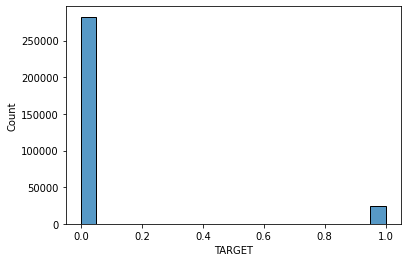

In [40]:
sns.histplot(cleaned_train_df['TARGET'], kde = False)

In [49]:
def categorial_features(data):
    categorical = data.select_dtypes(include = ['category']).columns

    for i, col in enumerate(categorical):
        if col == 'target':
            continue
        sns.histplot(x = data[col], kde = False)
    
        plt.show()
        
categorial_features(cleaned_train_df)

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>],
       [<AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_EMAIL'}>,
        <AxesSubplot:title={'center':'CNT_FAM_

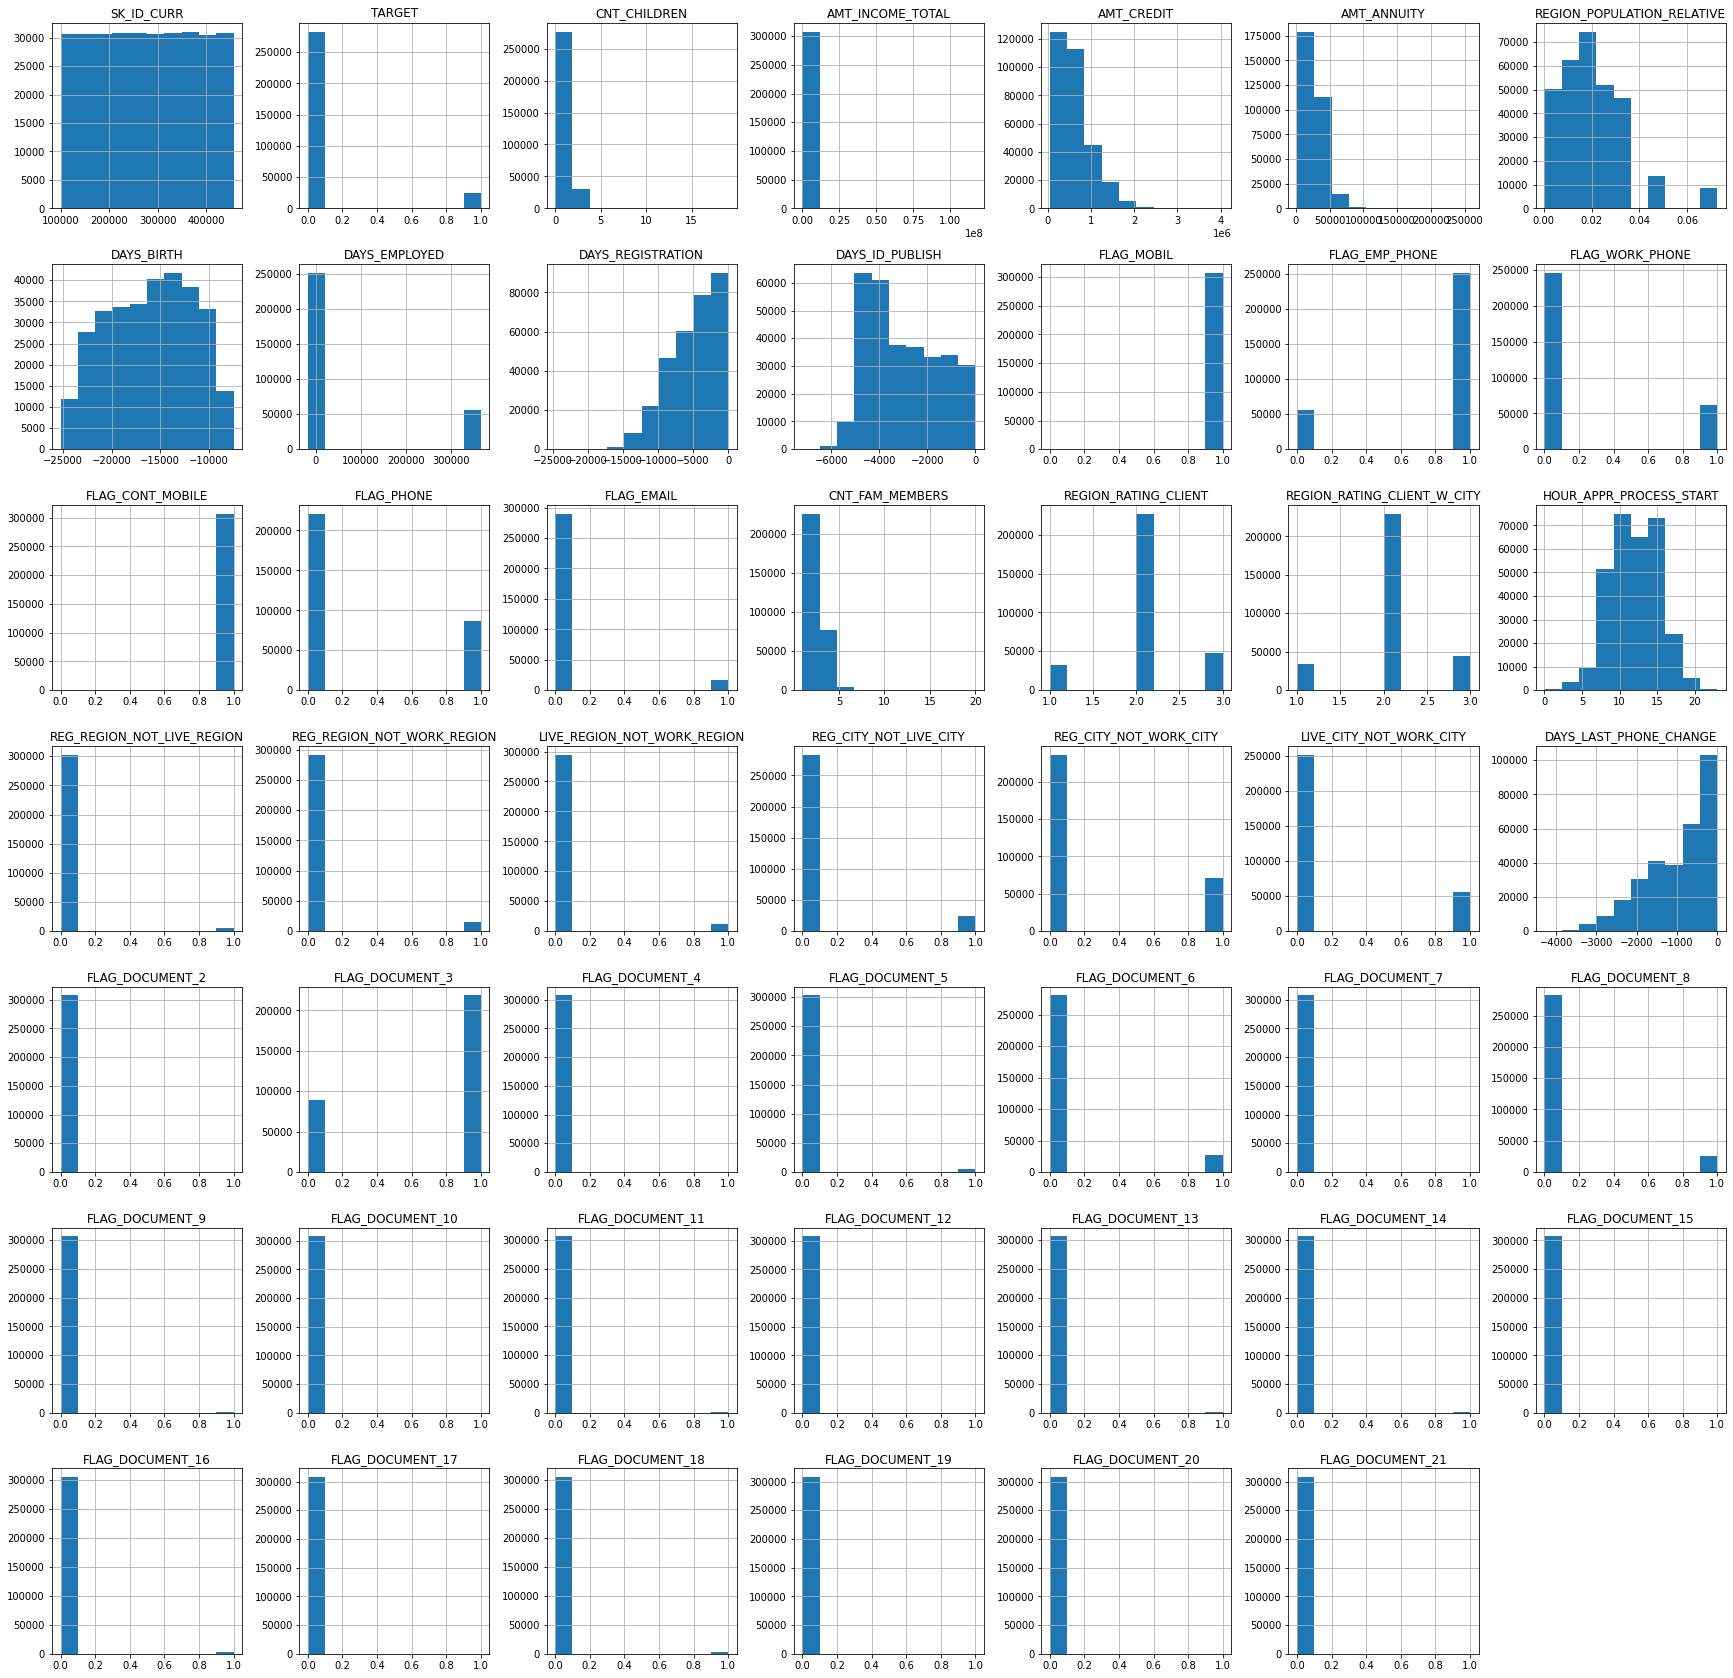

In [45]:
cleaned_train_df.select_dtypes(exclude = ['category', 'object']).hist(figsize = (30, 30))

<AxesSubplot:>

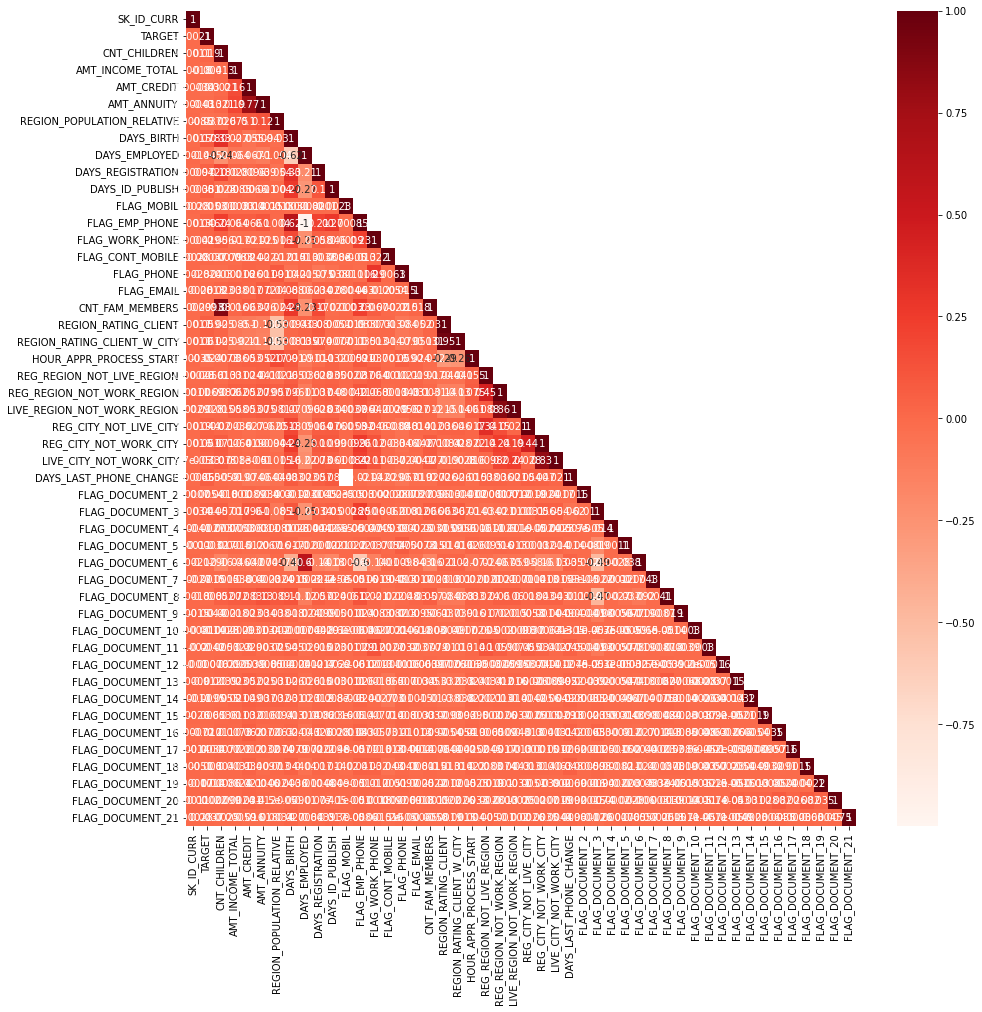

In [54]:
# кореляційна матриця

correlation_matrix = cleaned_train_df.corr()
mask = np.array(correlation_matrix)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

sns.heatmap(correlation_matrix, cmap="Reds", mask=mask, annot=True)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

def transform_table(data):
    numerical_features = data.select_dtypes(exclude = ['object']).columns
    category_features = data.select_dtypes(exclude=['int64', 'float64']).columns

    transformer = ColumnTransformer(
     transformers = [
         ('numerical', StandardScaler(), numerical_features),
         ('categorical', OneHotEncoder(), category_features)
     ],
)
    return pd.DataFrame(transformer.fit_transform(data))


cleaned_train_df = cleaned_train_df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY']]

train_x = transform_table(cleaned_train_df.drop('TARGET', axis = 1))
train_y = cleaned_train_df['TARGET']
display(train_x.head())

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.142129,-0.478095,-0.456215,1.506880,-0.062699,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.426792,1.725450,-0.460115,-0.166821,-2.051813,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.427196,-1.152888,-0.453299,-0.689509,-0.062699,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.142533,-0.711430,-0.473217,-0.680114,-0.062699,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.199466,-0.213734,-0.473210,-0.892535,-0.062699,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


def PredictModel(model):
  model.fit(train_split_x, train_split_y)
  train_predictions = model.predict(train_split_x)
  validate_predictions = model.predict(validate_x)

  print(f'Train accuracy: {accuracy_score(train_split_y, train_predictions)}     ROC_AUC: {roc_auc_score(train_split_y, train_predictions)}')
  print(f'Validate accuracy: {accuracy_score(validate_y, validate_predictions)}     ROC_AUC: {roc_auc_score(validate_y, validate_predictions)}')


train_split_x, validate_x, train_split_y, validate_y = train_test_split(train_x, train_y, test_size = 0.2)
PredictModel(LogisticRegression(max_iter = 1000))

Train accuracy: 0.9194294494487985     ROC_AUC: 0.5001106677961135
Validate accuracy: 0.9186543745833536     ROC_AUC: 0.5002996404314822
